# **Exploratory Data Analysis** (EDA)

---



In [1]:
pip install matplotlib seaborn isodate

===== CHANNEL SUMMARY =====
Channel ID       : UCBa659QWEk1AI4Tg--mrJ2A
Channel Title    : Tom Scott
Subscribers      : 6600000
Total Videos     : 731

===== DATASET OVERVIEW =====
(50, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       50 non-null     object             
 1   title                    50 non-null     object             
 2   description              50 non-null     object             
 3   publishedAt              50 non-null     datetime64[ns, UTC]
 4   tags                     2 non-null      object             
 5   categoryId               50 non-null     int64              
 6   defaultLanguage          50 non-null     object             
 7   defaultAudioLanguage     50 non-null     object             
 8   thumbnail_default        50 non-null     o

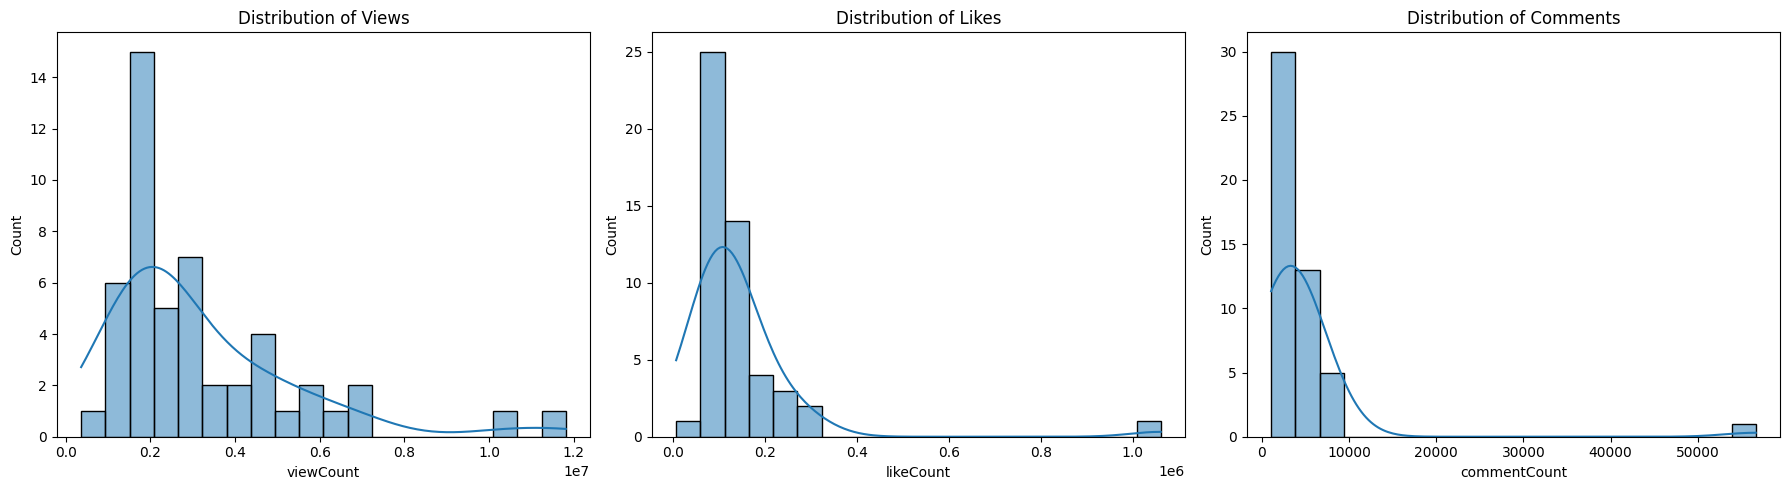

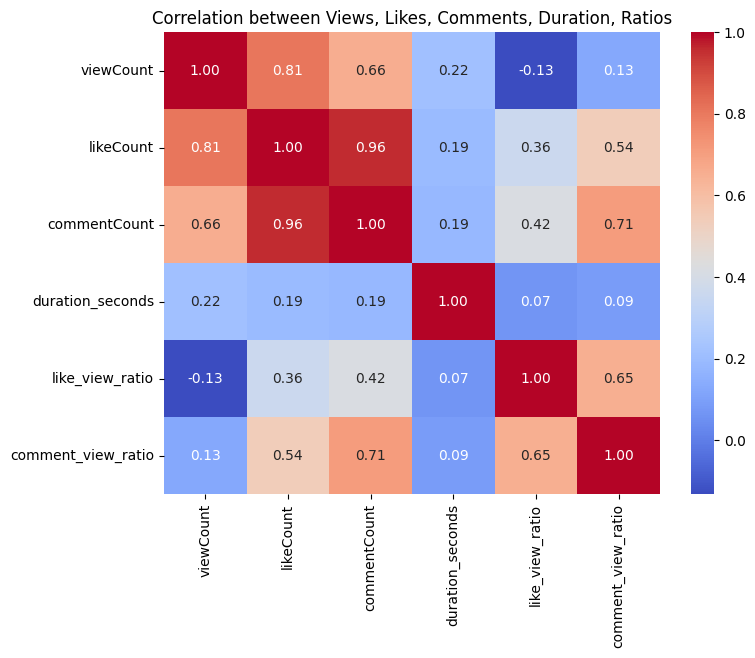

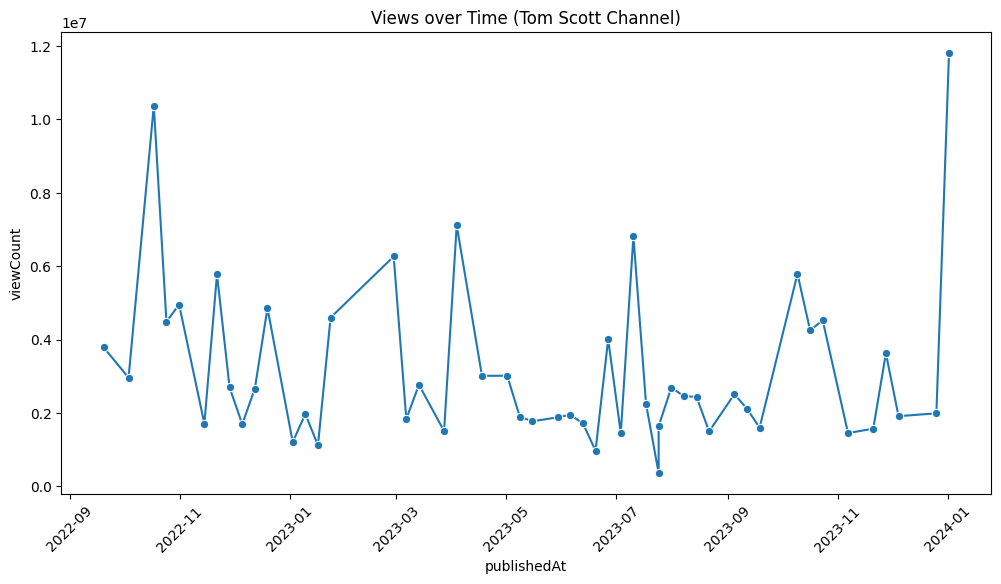

/tmp/ipython-input-2173836581.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_views, y="title", x="viewCount", palette="viridis")


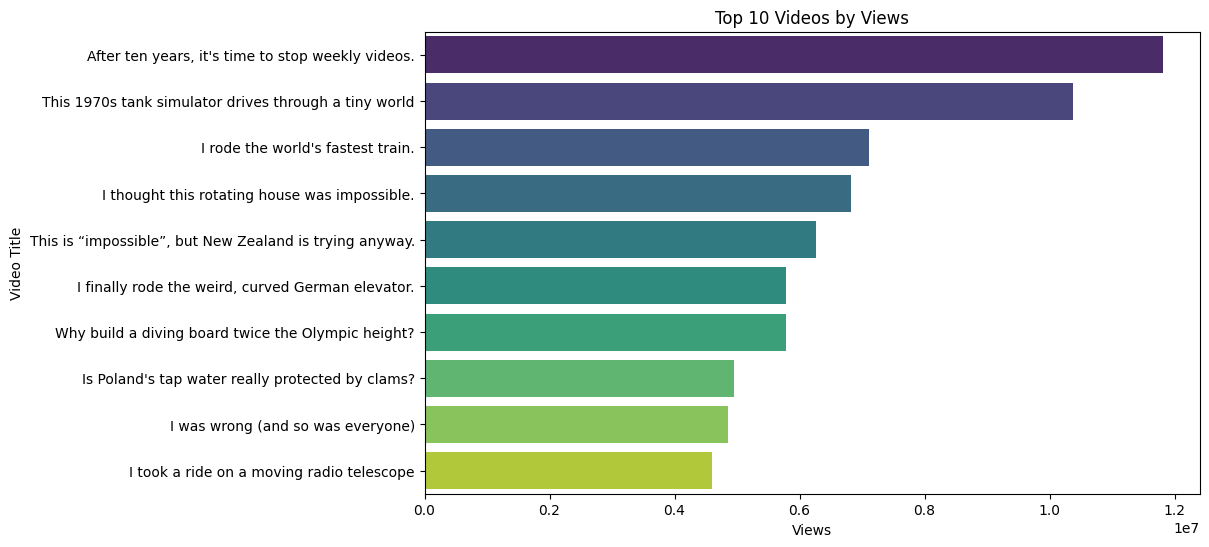

/tmp/ipython-input-2173836581.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_engagement, y="title", x="like_view_ratio", palette="mako")


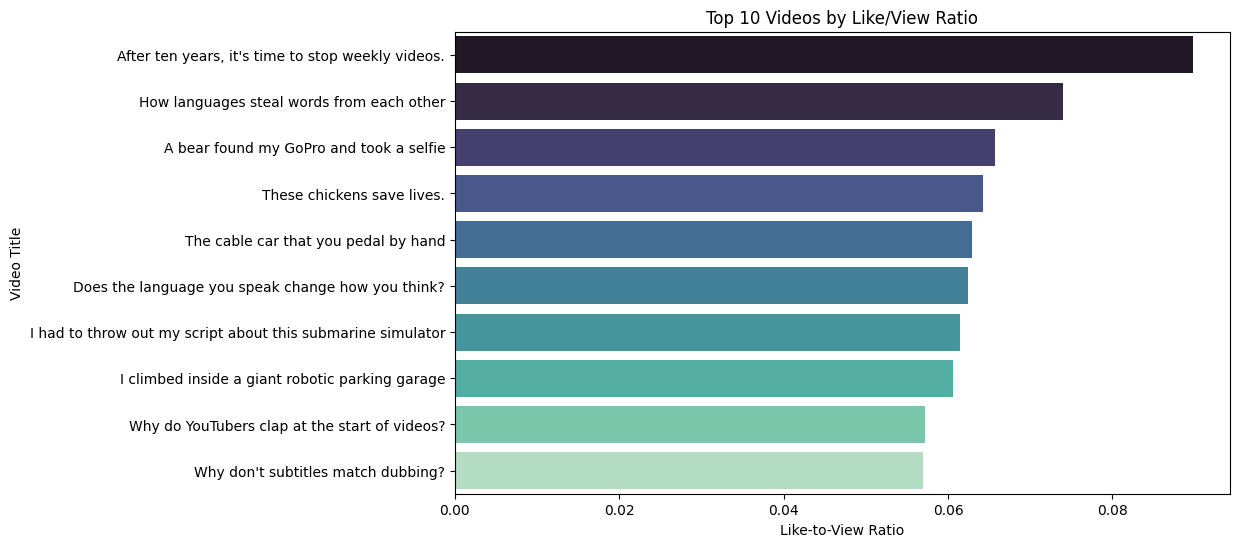

Index(['id', 'title', 'description', 'publishedAt', 'tags', 'categoryId',
       'defaultLanguage', 'defaultAudioLanguage', 'thumbnail_default',
       'thumbnail_high', 'duration', 'viewCount', 'likeCount', 'commentCount',
       'privacyStatus', 'channel_id', 'channel_title', 'channel_description',
       'channel_country', 'channel_thumbnail', 'channel_subscriberCount',
       'channel_videoCount', 'duration_seconds', 'like_view_ratio',
       'comment_view_ratio'],
      dtype='object')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import isodate

channel_details_df = pd.read_csv("/content/youtube_channel_videos_50.csv")



channel_details_df["publishedAt"] = pd.to_datetime(channel_details_df["publishedAt"])

channel_details_df["duration_seconds"] = channel_details_df["duration"].apply(
    lambda x: isodate.parse_duration(x).total_seconds()
)

channel_details_df["like_view_ratio"] = channel_details_df["likeCount"] / channel_details_df["viewCount"]
channel_details_df["comment_view_ratio"] = channel_details_df["commentCount"] / channel_details_df["viewCount"]

channel_id = channel_details_df["channel_id"].iloc[0]
channel_title = channel_details_df["channel_title"].iloc[0]
subscribers = channel_details_df["channel_subscriberCount"].iloc[0]
video_count = channel_details_df["channel_videoCount"].iloc[0]

print("===== CHANNEL SUMMARY =====")
print(f"Channel ID       : {channel_id}")
print(f"Channel Title    : {channel_title}")
print(f"Subscribers      : {subscribers}")
print(f"Total Videos     : {video_count}")

print("\n===== DATASET OVERVIEW =====")
print(channel_details_df.shape)
print(channel_details_df.info())
print(channel_details_df.describe())


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(channel_details_df["viewCount"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Views")

sns.histplot(channel_details_df["likeCount"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Likes")

sns.histplot(channel_details_df["commentCount"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Distribution of Comments")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
corr = channel_details_df[["viewCount","likeCount","commentCount","duration_seconds",
                           "like_view_ratio","comment_view_ratio"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Views, Likes, Comments, Duration, Ratios")
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data=channel_details_df.sort_values("publishedAt"),
             x="publishedAt", y="viewCount", marker="o")
plt.xticks(rotation=45)
plt.title(f"Views over Time ({channel_title} Channel)")
plt.show()

top_views = channel_details_df.nlargest(10, "viewCount")[["title","viewCount"]]
plt.figure(figsize=(10,6))
sns.barplot(data=top_views, y="title", x="viewCount", palette="viridis")
plt.title("Top 10 Videos by Views")
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.show()

top_engagement = channel_details_df.nlargest(10, "like_view_ratio")[["title","like_view_ratio"]]
plt.figure(figsize=(10,6))
sns.barplot(data=top_engagement, y="title", x="like_view_ratio", palette="mako")
plt.title("Top 10 Videos by Like/View Ratio")
plt.xlabel("Like-to-View Ratio")
plt.ylabel("Video Title")
plt.show()
print(channel_details_df.columns)

===== TRANSCRIPTS OVERVIEW =====
(50, 4)
        word_count    char_count
count    50.000000     50.000000
mean    998.340000   5492.560000
std     371.646783   2012.711352
min       5.000000     33.000000
25%     779.500000   4315.500000
50%     962.500000   5427.000000
75%    1187.750000   6366.000000
max    1970.000000  10384.000000


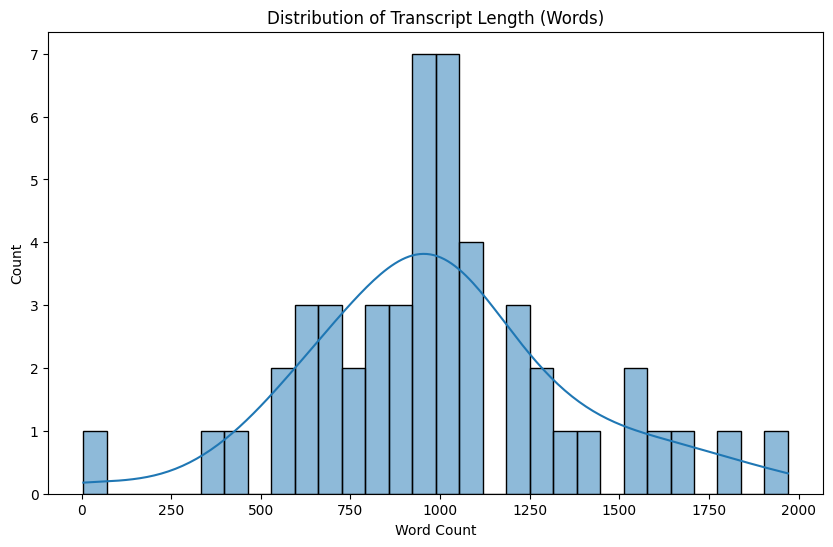

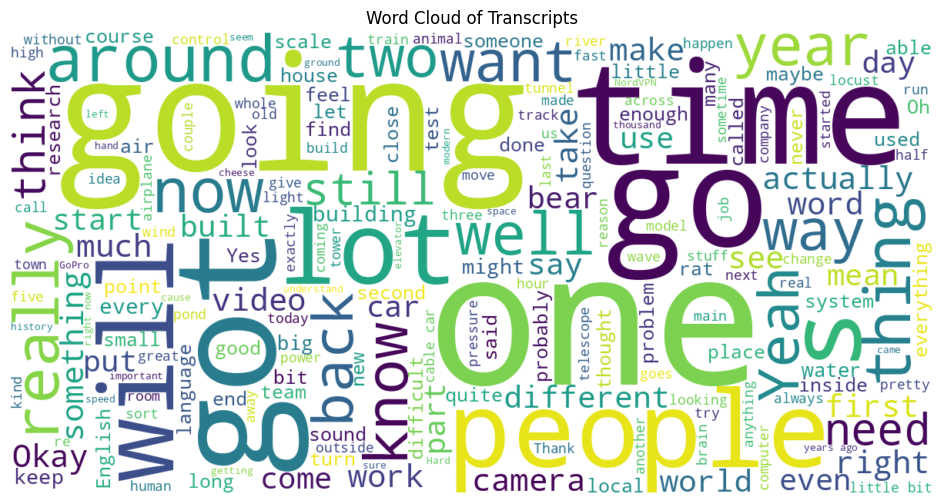

/tmp/ipython-input-1194306818.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x="count", y="word", palette="magma")


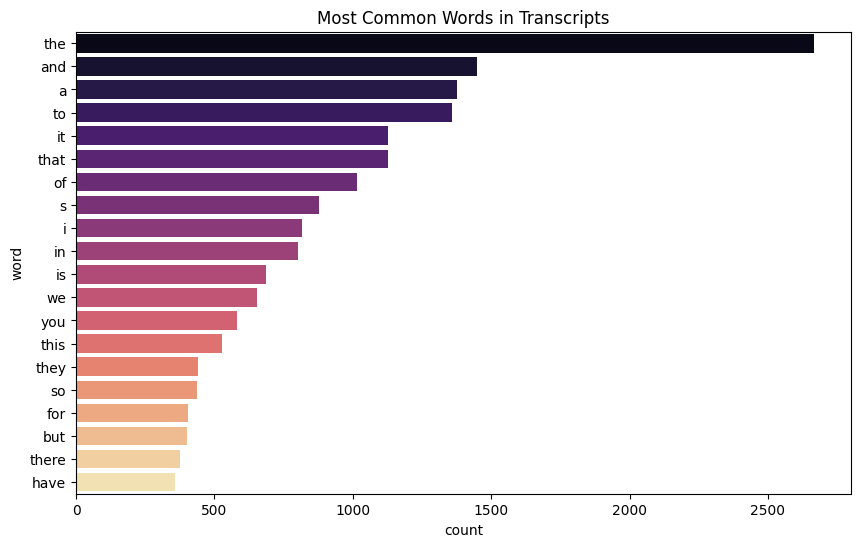

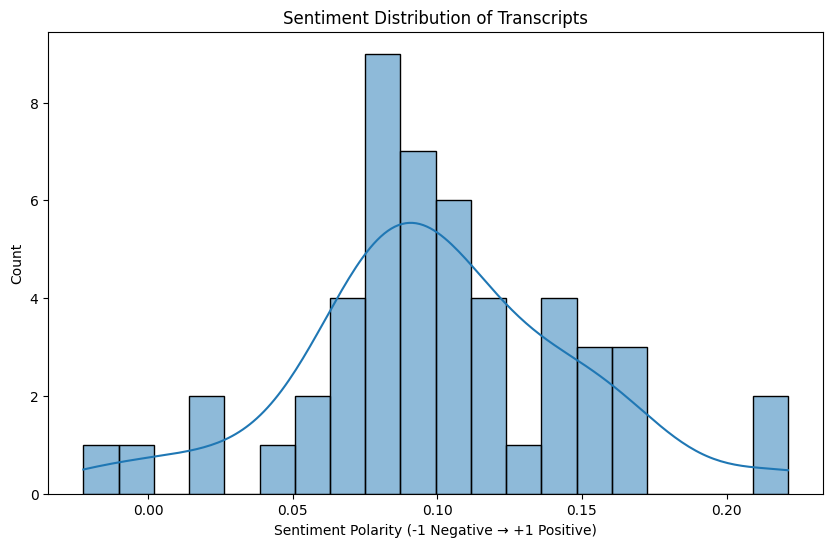

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from textblob import TextBlob

# Load transcripts
transcripts_df = pd.read_csv("/content/all_transcripts.csv")

# ===== BASIC TEXT STATS =====
transcripts_df["word_count"] = transcripts_df["transcript"].apply(lambda x: len(str(x).split()))
transcripts_df["char_count"] = transcripts_df["transcript"].apply(lambda x: len(str(x)))

print("===== TRANSCRIPTS OVERVIEW =====")
print(transcripts_df.shape)
print(transcripts_df[["word_count","char_count"]].describe())

# Distribution of transcript lengths
plt.figure(figsize=(10,6))
sns.histplot(transcripts_df["word_count"], bins=30, kde=True)
plt.title("Distribution of Transcript Length (Words)")
plt.xlabel("Word Count")
plt.show()

# ===== WORD CLOUD =====
all_text = " ".join(transcripts_df["transcript"].dropna().tolist())
wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Transcripts")
plt.show()

# ===== FREQUENT WORDS =====
words = re.findall(r'\w+', all_text.lower())
common_words = Counter(words).most_common(20)

freq_df = pd.DataFrame(common_words, columns=["word","count"])
plt.figure(figsize=(10,6))
sns.barplot(data=freq_df, x="count", y="word", palette="magma")
plt.title("Most Common Words in Transcripts")
plt.show()

# ===== SENTIMENT ANALYSIS =====
transcripts_df["sentiment"] = transcripts_df["transcript"].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)

plt.figure(figsize=(10,6))
sns.histplot(transcripts_df["sentiment"], bins=20, kde=True)
plt.title("Sentiment Distribution of Transcripts")
plt.xlabel("Sentiment Polarity (-1 Negative → +1 Positive)")
plt.show()


In [6]:
print(transcripts_df.columns)

Index(['video_id', 'transcript', 'word_count', 'char_count', 'sentiment'], dtype='object')
